# CSCI4022 Homework 1; Review

## Due Monday, Sept. 9 at 11:59 pm to Canvas

#### Submit this file as a .ipynb with *all cells compiled and run* to the associated dropbox.



In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy.stats

Name: Adam Ten Hoeve

## Problem 1 (Bayes; 10 points)

Nationally, 1 in 10000 people have a specific rare disease. Suppose a test for the disease is administered such the probability that a person with the disease returns a positive test is *100%*.  The probability that a person without the disease returns a positive test is .02.
 - What is the probability that a person tests positive?
 - What is the probability that a person has the disease *given* they test positive?
 
Use the following markdown cell to show all work in computing the exact answer.

To solve for the probability that a person tests positive, we can use the Law of Total Probability.
$$
\begin{align*}
    P(Pos) &= P(Pos|Disease)P(Disease) + P(Pos|Disease^c)P(Disease^c) \\
    &= (1)(\frac{1}{10,000}) + (0.02)(\frac{9,999}{10,000}) \\
    &= 0.020098
\end{align*}
$$

To solve for the conditional probability, we can use Bayes' Rule.
$$
\begin{align*}
    P(Disease|Pos) &= \dfrac{P(Pos|Disease)P(Disease)}{P(Pos)} \\
    &= \dfrac{(0.02)(0.0001)}{(0.020098)} \\
    &= 0.00498
\end{align*}
$$

## Problem 2 (Numerics... kind of; 15 points)

####  a) Solve for $b$ in the matrix-vector product $$\begin{bmatrix}a_1 & a_2 \\ a_3 & a_4\end{bmatrix} \cdot \begin{bmatrix}x_1\\ x_2\end{bmatrix}=b.$$

####  How many computations does this take, if each multiplication and addition is counted as a separate computation?  

 #### What about for

$$\begin{bmatrix}a_1 & a_2 &a_3 \\ a_4 & a_5 &a_6 \\ a_7&a_8&a_9 \end{bmatrix} \cdot \begin{bmatrix}x_1\\ x_2\\x_3\end{bmatrix}=b?$$

Use the following markdown cell to show all work in computing the exact answer.


For the $2 \times 2 * 2 \times 1$:
$$ b = \begin{bmatrix}a_1x_1 + a_2x_2 \\ a_3x_1 + a_4x_2\end{bmatrix}$$

Each row takes 2 multiplications and 1 addition, resulting in 3 computations per row. There are 2 rows in the resulting vector, therefor the total number of computations is $2(3) = \boxed{6 \text{ computations}}$.


For the $3 \times 3 * 3 \times 1$:
$$ b = \begin{bmatrix}
a_1x_1 + a_2x_2 + a_3x_3 \\ 
a_4x_1 + a_5x_2 + a_6x_3 \\
a_7x_1 + a_8x_2 + a_9x_3
\end{bmatrix}$$

Each row has 3 multiplications and 2 additions, which results in 5 computations per row. There are 3 rows in the resulting vector, therefor the total number of computations is $3(5) = \boxed{15 \text{ computations}}$.


####  b) How many computations does matrix-vector computation take if the matrix $A$ is a square $n \times n$ matrix and the vector $x$ is $n \times 1$? 

Visually:

$$\begin{bmatrix} 
    a_{11} & a_{12} & \dots \\
    \vdots & \ddots & \\
    a_{n1} &        & a_{nn} 
    \end{bmatrix}  \cdot \begin{bmatrix}x_1\\ \vdots \\x_n\end{bmatrix}=b$$

Use the following markdown cell to show all work in computing the exact answer.


To begin, lets think in terms of a $1 \times n \cdot n \times 1$ computation.

$$
\begin{bmatrix}
    a_{11} & a_{12} & \dots & a_{1n}
\end{bmatrix}
\cdot
\begin{bmatrix}
    x_{11} \\
    \vdots \\
    x_{n1}
\end{bmatrix}
$$

Each element in the row vector will be multiplied by one element of the column vector: $a_{11} \cdot x_{11}, \space a_{12} \cdot x_{21}, \space \dots, \space a_{1n} \cdot x_{n1}$. This takes n compuations. 

Next, we add each product together to get a single scalar value: $a_{11}x_{11}+a_{12}x_{21} + \dots + a_{1n}x_{n1}$. If $n=2$, then there is 1 addition. If $n=3$, there are 2 additions. Following this pattern, we can see that there are $n-1$ additions for our n dimensional vector.

In total, it takes $n + (n-1) = 2n - 1$ computations to multiply our row vector and column vector. We will perform this row $\times$ column multiplication for each row in matrix $A$, which is $n$ times. Therefor, it takes $n(2n-1)= \boxed{2n^2-n \text{ computations}}$.

#### c) How many computations does square matrix-matrix multiplication take if each matrix is $n \times n$? 

For example:

$$\begin{bmatrix} 
    a_{11} & a_{12} & \dots \\
    \vdots & \ddots & \\
    a_{n1} &        & a_{nn} 
    \end{bmatrix} \cdot 
    \begin{bmatrix} 
    b_{11} & b_{12} & \dots \\
    \vdots & \ddots & \\
    b_{n1} &        & b_{nn} 
    \end{bmatrix}=C$$
    
Hint: how many computations for the entry $c_{ij}$ in row $i$, column $j$?

If $n=10^4$, what number is this?

Similar to problem *b*, each cell $c_{ij}$ requires the $n$ products between a row in $A$ and a column in $B$, and then $n-1$ additional addition operations to add those products together. This means each cell in $C$ takes $2n-1$ calculations.

There are $n \times n = n^2$ cells in matrix $C$. Therefor it takes $n^2(2n-1) = \boxed{2n^3-n^2 \text{calculations}}$ to perform matrix-matrix multiplication on two $n \times n$ matricies.

When $n=10^4$, that is $2(10^4)^3-(10^4)^2 = 2(10^{12}) - 10^8 = 1,999,900,000,000 = \boxed{1.9999 * 10^{12}}$ calculations.

## Problem 3 (EDA, SLR; 20 points)

NOAA's Physical Sciences division (https://www.esrl.noaa.gov/psd) houses an enormous amount of weather data.  Load `hw1BoulderPPT.csv` from the course page for the last 100 years of monthly precipitation data from Boulder.

#### a) When the amount of precipitation was nonzero but too small to be recorded, this data set recorded `tr`.  Replace these with zeroes.

In [3]:
df = pd.read_csv("hw1BoulderPPT.csv")
df.replace("Tr", 0, inplace=True)
df = df.apply(pd.to_numeric)
df.head()

,Year,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC,YEAR TOTAL
0,1919,0.00,0.32,1.49,1.65,0.88,1.10,7.46,0.95,0.88,1.31,2.07,0.50,18.61
1,1920,1.22,1.39,0.58,4.07,1.61,1.87,0.68,2.55,0.73,2.43,0.72,0.85,18.70
2,1921,0.11,0.31,0.77,4.81,1.50,3.62,1.53,2.00,0.17,1.13,0.98,1.46,18.39
3,1922,0.63,0.59,0.81,3.32,1.02,0.62,1.04,1.50,0.00,1.13,2.58,0.56,13.80
4,1923,0.00,1.71,2.29,1.29,3.47,4.44,2.46,2.68,0.84,5.43,0.40,0.88,25.89


#### b) Generate a series of 12 box plots with month as the x axis and precipitation on the y-axis.

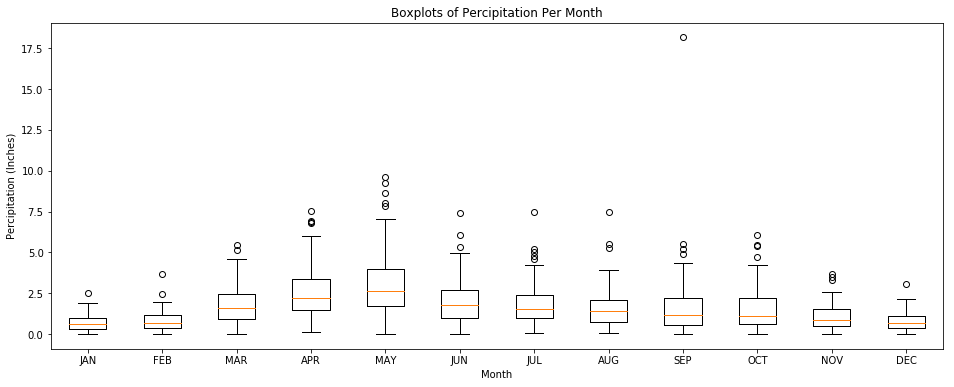

In [4]:
# percip_per_month = [df[["JAN"]], df[["FEB"]], df[["MAR"]], df[["APR"]], df[["MAY"]], df[["JUN"]], df[["JUL"]], df[["AUG"]], df[["SEP"]], df[["OCT"]], df[["NOV"]], df[["DEC"]]]
percip_per_month = [df.iloc[:, i] for i in range(1, 13)]

fig, ax = plt.subplots(1, 1, figsize=(16, 6))
ax.boxplot(percip_per_month)
ax.set_ylabel("Percipitation (Inches)")
ax.set_xlabel("Month")
ax.set_xticklabels(["JAN", "FEB", "MAR", "APR", "MAY", "JUN", "JUL", "AUG", "SEP", "OCT", "NOV", "DEC"])
ax.set_title("Boxplots of Percipitation Per Month");


#### c) Atmospheric scientists love to group months seasonally, breaking the year into a Winter season including December, January, February; a Spring included March, April, and May; and so forth. Generate a series of 4 box plots with season as the x axis and precipitation on the y-axis.



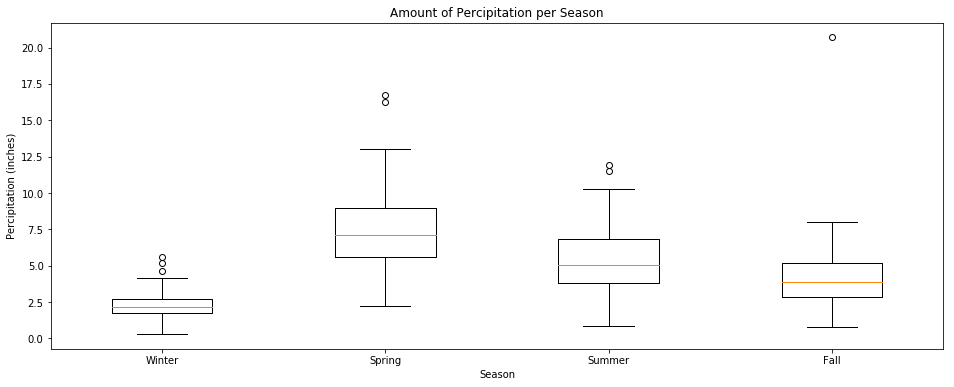

In [5]:
df["Winter"] = df["DEC"] + df["JAN"] + df["FEB"]
df["Spring"] = df["MAR"] + df["APR"] + df["MAY"]
df["Summer"] = df["JUN"] + df["JUL"] + df["AUG"]
df["Fall"] = df["SEP"] + df["OCT"] + df["NOV"]

percip_per_season = [df["Winter"], df["Spring"], df["Summer"], df["Fall"]]
fig, ax = plt.subplots(1, 1, figsize=(16, 6))
ax.boxplot(percip_per_season)
ax.set_ylabel("Percipitation (inches)")
ax.set_xlabel("Season")
ax.set_xticklabels(["Winter", "Spring", "Summer", "Fall"])
ax.set_title("Amount of Percipitation per Season");

#### d) Calculute the mean and standard deviation of the September precipitation in this set.  Suppose monthly precipitation in September is normally distributed with this mean and standard deviation.  If this is true, what is the associated probability of observing `18.16 inches`  of rainfall in any given September, as occurs in 2013?  Explain.

In [20]:
mean = df["SEP"].mean()
std = df["SEP"].std()

print("The mean percipitation of September is {:0.4f}".format(mean))
print("The standard deviation of Septermber percipitation is {:0.4f}".format(std))

The mean percipitation of September is 1.6582
The standard deviation of Septermber percipitation is 2.0696


Assuming that the amount of rain is normally distributed with mean 1.6582 and standard deviation 2.0696, the probability of observing at least 18.16 inches of rain can be expressed by:

$$
\begin{align*}
    P(X \ge 18.16) &= 1 - P(X < 18.16) \\
                   &= 1 - P(\frac{X-1.66}{2.07} < \frac{18.16-1.66}{2.07}) \\
                   &= 1 - P(Z < 7.97) \\
                   &= 1 - \Phi(7.97) \\
                   &\approx \boxed{ 7.7716 \times 10^{-16} }
\end{align*}
$$



$7.77 \times 10^{-16}$ is a very small probability. The normal distribution has higher probabilities for values closer to the mean, and lower probabilities for values further away. Therefor, it makes sense that we got a very low probability because 18.16 is almost 9 standard deviations from the mean, which is a very far distance.

#### e) Following the distribution in part d); what is the associated probability of observing `18.16 inches`  of rainfall in *any* September of 100 observed, assuming each year is independent?  Explain.

The probability that that any year contains 18.16 inches of rainfall is the same as the complement to the probability that none of the years contain 18.16 inches of rainfall.

$$ P(\text{any are 18.16}) = 1 - P(\text{none are 18.16}) $$

Because they are independent trials, we can solve the probability that none are 18.16 inches by taking the product of each event not being 18.16 inches. For example, if we had 2 years of data, then the probability that we did not observe 18.16 inches would be:

$$ 
\begin{align*}
P(\text{Not observed in 2 years}) &= P(\text{Not observed in year 1})*P(\text{Not observed in year 2}) \\
                                   &\stackrel{iid}{=} P(\text{Not observed})^2 \\
                                   &= (1 - 7.7716*10^{-16})^2
\end{align*}
$$

Following this logic, for 100 observed trials, we would get the probability to be:
$$
\begin{align*}
   P(\text{Any are 18.16}) &= 1 - P(\text{Not Observed})^{100} \\
   &= 1 - (1 - 7.7716*10^{-16})^{100} \\
   &\approx \boxed{ 7.7716 \times 10^{-14} }
\end{align*}
$$

#### f) Construct a linear model to determine whether year is a significant predictor of annual precipitation.  Is there evidence to suggest that precipitation in Boulder has changed over time?  Include a plot of the residuals of your model over time.  Is there evidence to suggest that each year may not be independent of the prior year?

In [9]:
import statsmodels.api as sm
    
X = df["Year"]
X = sm.add_constant(X)
y = df["YEAR TOTAL"]

model = sm.OLS(y, X)
results = model.fit()

D:\Anaconda\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


In [10]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             YEAR TOTAL   R-squared:                       0.068
Model:                            OLS   Adj. R-squared:                  0.058
Method:                 Least Squares   F-statistic:                     7.101
Date:                Mon, 09 Sep 2019   Prob (F-statistic):            0.00901
Time:                        15:50:36   Log-Likelihood:                -291.49
No. Observations:                 100   AIC:                             587.0
Df Residuals:                      98   BIC:                             592.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -62.5472     30.752     -2.034      0.045    -123.573      -1.521
Year           0.0416      0.016      2.665      0.009       0.011       0.073
==============================================================================
Omnibus:                        4.967   Durbin-Watson:                   2.285
Prob(Omnibus):                  0.083   Jarque-Bera (JB):                4.866
Skew:                           0.539   Prob(JB):                       0.0878
Kurtosis:                       2.929   Cond. No.                     1.34e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.34e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

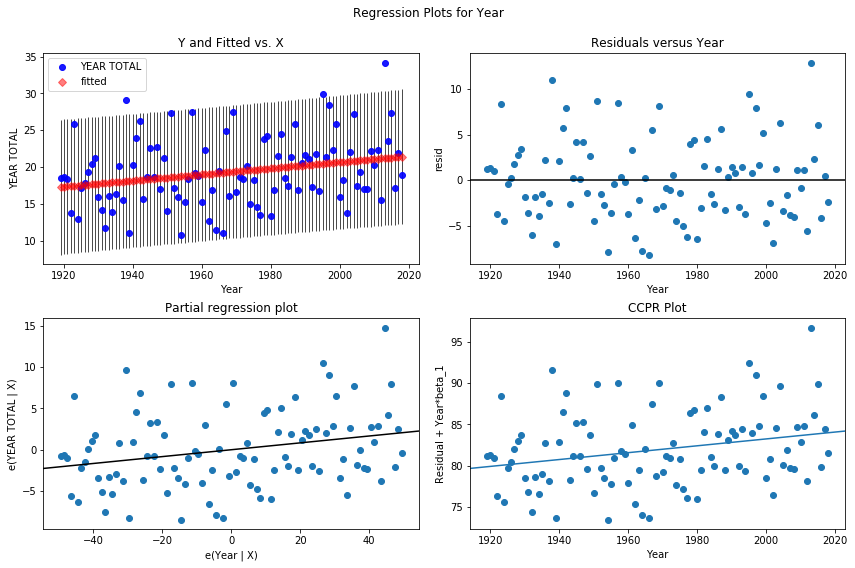

In [11]:
fig = plt.figure(figsize=(12,8))
fig = sm.graphics.plot_regress_exog(results, "Year", fig=fig)

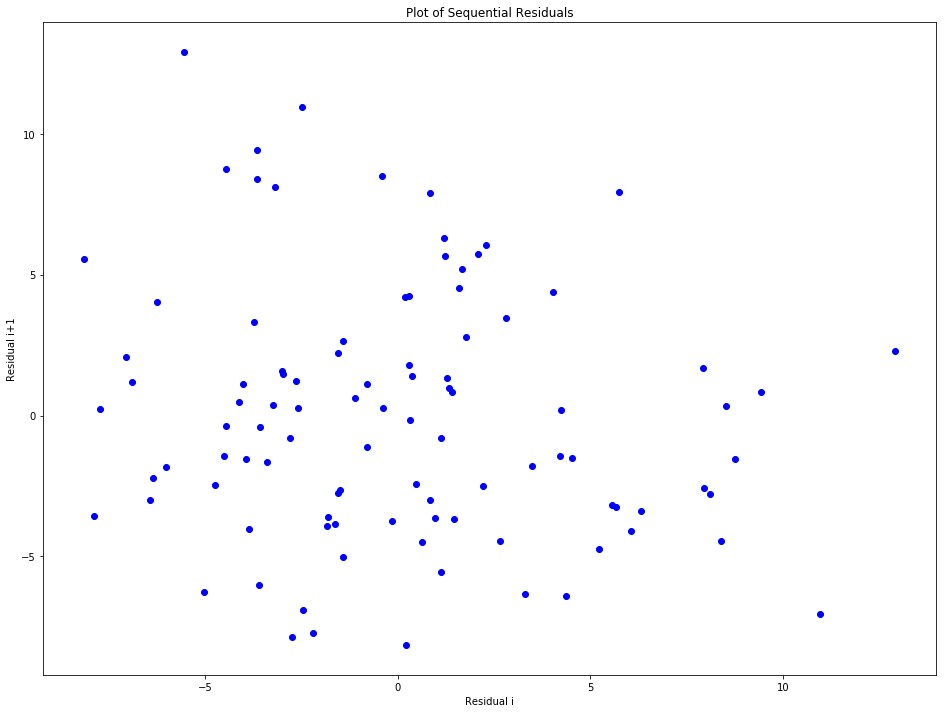

In [113]:
fig, ax = plt.subplots(1, 1, figsize=(16,12))

ax.plot(results.resid[0:-1], results.resid[1:], "bo")
ax.set_title("Plot of Sequential Residuals")
ax.set_xlabel("Residual i")
ax.set_ylabel("Residual i+1");

After fitting our model, we see that the Year parameter has a coefficient of 0.0416. This implies some minor increase in rainfall as the years increase. The p-value of this feature is 0.009, which is less than 0.05, which means that it is significant and the amount of rainfall is changing over time.

In the collection of four plots above, we will only look at the top right one. From that plot we can see that there is no clear structure to the residuals as they are roughly evenly distributed around 0. This means that the residuals likely aren't correlated to the previous year.

From the plot of Sequential Residuals, we can determine if there is a pattern in how one year affects the next year. If there was some obvious structure to the graph, then we could make the observation that the errors are not independent, and therefor are influenced by the previous year. Because there is not any obvious structure, this also supports our claim that each year's percipitation is independent from the previous year.

## Problem 4 (Hypothesis Simulation; 15 points)


One question we will often be tasked with in the semester is asking what "random" looks like.  In hypothesis testing, we typically ask "what is the probability of observing *this* test statistic if everything is fair/random."  We can then do so for a variety of test statistics (`Z`, `T`, proportions, sample variances, etc.) to draw conclusions like "That doesn't look random!  It's extremely unlikely to happen under the **null hypothesis**, so we reject that hypothesis."

As we develop new tools this semester, simulation can help us determine what our tools do if everything is random, which helps provide context to the answers we get on real data - which ideally includes a real signal in it that we want to discover.

## How correlated is really correlated?

The code below simulates from the bivariate normal distribution, which we'll use later this semester.  In brief, it simulates a list of points (called `rnorms` below) as an $j \times 2$ array where each of the `j` rows is an $(x,y)$ point.  We can either simulate these two column vectors $X$ and $Y$ so they're actually independent and the true correlation coefficient $\rho_{xy}=0$ OR we can simulate them with actual correlations included.

We want to know how much correlation is required for us to be able to meaningfully detect it.  Note that our simulated "*sample*" correlation coefficients never actually match the true value!

Example code:

[[1.        0.0183285]
 [0.0183285 1.       ]]
[[1.         0.87144217]
 [0.87144217 1.        ]]


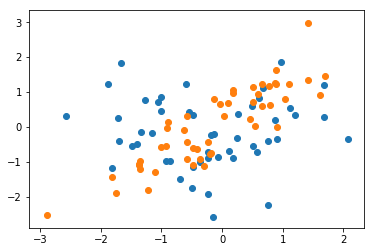

In [117]:
rho=0
rnorms=np.random.multivariate_normal([0,0], [[1,rho],[rho,1]],50)  #sample of size j=50 indepenent N(0,1)
print(np.corrcoef(rnorms[:,0],y=rnorms[:,1]))
plt.scatter(rnorms[:,0],y=rnorms[:,1]) #sanity check... do they look uncorrelated?


rho=.8
rnorms=np.random.multivariate_normal([0,0], [[1,rho],[rho,1]],50)  #sample of size j=50 rho=.8 N(0,1)
print(np.corrcoef(rnorms[:,0],y=rnorms[:,1]))
plt.scatter(rnorms[:,0],y=rnorms[:,1]) #sanity check... do they look correlated?

##### a) Our goal is to understand at what point we can actually tell whether or not things are correlated. To this end, let the example code above guide you to code that allows you to:

 - i) Generate a sample of `j=10` bivariate normals (of mean 0, variance 1) that are uncorrelated.  Calculate the correlation of this sample.
 - ii) Repeat step `i` 1000 times.  Save all 1000 correlation coefficients.
 - iii) Repeat steps `i` and `ii` for `j=100` and `j=1000`.  We now have 3000 correlation coefficients across 3 values of `j`.
 


In [4]:
mean = 0
var = 1

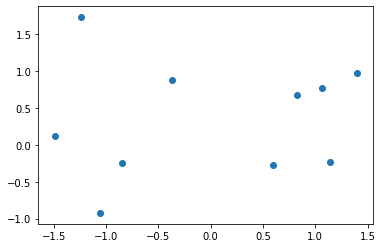

In [5]:
# part (i)
j = 10
# Generate j uncorrelated samples
rnorms = np.random.multivariate_normal([mean, mean], [[var, 0],[0, var]], j)
corr = np.corrcoef(rnorms[:,0], y=rnorms[:,1])
corr[0, 1]
plt.scatter(rnorms[:,0],y=rnorms[:,1]); #sanity check... do they look uncorrelated?

In [7]:
# part (ii)
corrs = []
j = 10
for i in range(1000):
    rnorms = np.random.multivariate_normal([mean, mean], [[var, 0],[0, var]], j)
    corr = np.corrcoef(rnorms[:,0], y=rnorms[:,1])
    corrs.append(corr[0, 1])

In [8]:
# part (iii)
corrs = []
j_samples = [10, 100, 1000]
for j in j_samples:
    for i in range(1000):
        rnorms = np.random.multivariate_normal([mean, mean], [[var, 0],[0, var]], j)
        corr = np.corrcoef(rnorms[:,0], y=rnorms[:,1])
        corrs.append(corr[0, 1])
len(corrs)


3000

In [10]:
len(corrs[1000:-1000])

1000

Consider testing the null hypothesis:
  - $H_0:$ These samples are uncorrelated
  
  against the alternative
  
  - $H_a:$ These samples have $\rho_{xy} \ne 0$.
  
#### b) At what sample correlations do we reject the null hypothesis if we set a probability of Type I error equal to .05?

In [12]:
correlated_rho = np.percentile(np.abs(corrs[1000:-1000]), 95)
correlated_rho

0.2048606516098483

When we assume a probability of Type I error as 0.05, we then reject the null hypothesis if the sample correlation is above (about) $0.1953$. This was taken from the 1000 simulations when j = 100.

#### c) Use additional simulations as in part a) to determine the power of our test in b) when `j=10`, `j=100`, and `j=1000` if the true correlation coefficient is $\rho=.1$.

In [13]:
rho = 0.1
j_samples = [10, 100, 1000]
n_samples = 1000
for j in j_samples:
    test_corrs = []
    for i in range(n_samples):
        rnorms = np.random.multivariate_normal([0, 0], [[1, 0.1],[0.1, 1]], j)
        corr = np.corrcoef(rnorms[:,0], y=rnorms[:,1])
        test_corrs.append(corr[0, 1])
    num_above = np.sum([0 if np.abs(corr) < correlated_rho else 1 for corr in test_corrs])
    power = num_above / n_samples
    print("With j = {}, the power of our test was {:0.4f}".format(j, power))

With j = 10, the power of our test was 0.5520
With j = 100, the power of our test was 0.1460
With j = 1000, the power of our test was 0.0000


#### d) Use additional simulations as in part a) to determine the power of our test in b) when `j=10`, `j=100`, and `j=1000` if the true correlation coefficient is $\rho=-.1$.  Should this differ from part c)?

In [14]:
rho = -0.1
j_samples = [10, 100, 1000]
n_samples = 1000
for j in j_samples:
    test_corrs = []
    for i in range(n_samples):
        rnorms = np.random.multivariate_normal([0, 0], [[1, rho],[rho, 1]], j)
        corr = np.corrcoef(rnorms[:,0], y=rnorms[:,1])
        test_corrs.append(corr[0, 1])
    num_above = np.sum([0 if np.abs(corr) < correlated_rho else 1 for corr in test_corrs])
    power = num_above / n_samples
    print("With j = {}, the power of our test was {:0.4f}".format(j, power))

With j = 10, the power of our test was 0.5970
With j = 100, the power of our test was 0.1430
With j = 1000, the power of our test was 0.0000


The powers when $\rho = 0.1$ and $\rho = -0.1$ were very similar. This makes sense because we're comparing the absolute values of the correlations, which should be about equal given that they're being generated using the same absolute value of the correlation.